# <span style='color:#e10000'>**Introduction**</span>

#### <span style='color:#E63946'>**Project Overview**</span>
In urban centers worldwide, bike-sharing systems have become a cornerstone of modern mobility, enhancing accessibility and reducing environmental impact. A critical challenge for these systems is ensuring a stable and efficient supply-making rental bikes available at the right place and time to minimize user waiting periods. This project aims to address this operational concern by conducting a comprehensive analysis of the [**Seoul Bike Sharing System**](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand).

The core objective is to explore and model the factors influencing bike rental demand to ultimately inform better inventory management and distribution strategies. By predicting the number of bikes required at any given hour, service providers can significantly improve system reliability and user satisfaction.

#### <span style='color:#E63946'>**Data Description**</span>
The analysis utilizes a detailed dataset capturing the hourly count of public bicycles rented, enriched with corresponding meteorological and calendar data. Key variables include:

*   **Target Variable:** `Rented Bike Count` - The number of bikes rented per hour.
*   **Temporal Features:** Date and hour, enabling precise time-series analysis.
*   **Weather Conditions:**  
    * `Temperature (°C)` - `Humidity (%)` - `Windspeed (m/s)` - `Visibility (10m)` - `Dew Point Temperature (°C)` - `Solar Radiation (MJ/m²)` - `Rainfall (mm)` - `Snowfall (cm)`
*   **Holiday Information:** A binary indicator for public holidays.

#### <span style='color:#E63946'>**Analytical Approach**</span>
This investigation will proceed through a structured pipeline:

 **Exploratory Data Analysis (EDA) in SQL:** Initial data profiling, summary statistics, and cohort analysis will be performed using SQL to understand data integrity, distributions, and foundational relationships.
 **Time Series Analysis:** We will decompose the rental patterns to identify trends, seasonal cycles (daily, weekly, monthly), and irregularities.
 **Visual Analytics with Plotly:** Interactive dashboards and visualizations will be built using Plotly to dynamically explore correlations between weather events, holidays, and rental demand, revealing intuitive, actionable insights.

Through this multi-faceted approach, the project seeks to uncover the complex dynamics of bike-sharing demand in Seoul, providing a data-driven foundation for operational planning and strategic decision-making.

# <span style='color:#e10000'>**Loading the data**</span>

In [2]:
# Importing libraries 
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
px.defaults.template = 'plotly_dark'
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

import duckdb
con = duckdb.connect()

In [3]:
data = pd.read_csv('.\Seoul Bike Sharing Demand\SeoulBikeData.csv', encoding='latin1')
df = data.copy()

In [4]:
# Sample
duckdb.sql("""
    SELECT *
    FROM df
    ORDER BY RANDOM() 
    LIMIT 20
""").df()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0   16/05/2018                225    23             22.0           97   
1   13/10/2018               1916    16             19.4           29   
2   10/02/2018                145     3              2.0           71   
3   05/11/2018                790    10             11.8           59   
4   22/12/2017                481    19              5.2           64   
5   13/08/2018               2036    19             32.1           60   
6   26/10/2018                900    16             14.5           81   
7   29/05/2018               1427     7             19.9           63   
8   19/11/2018               1233    17              8.7           48   
9   16/01/2018                256    11              3.9           57   
10  24/09/2018               1280    19             18.6           54   
11  18/04/2018                987     9             11.2           31   
12  23/01/2018                 84     6            -11.5           47   
13  10/03/2018                139     3              1.3           80   
14  09/11/2018                  0    16             14.3           59   
15  20/06/2018               1030     0             19.7           71   
16  14/12/2017                294    14             -2.7           28   
17  09/06/2018                766    23             20.7           66   
18  03/11/2018                  0     6              5.5           78   
19  15/06/2018               2441    20             22.6           51   

    Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                0.9               158                       21.4   
1                1.2              1154                        0.8   
2                1.2               534                       -2.7   
3                0.9               616                        4.0   
4                0.7               691                       -1.0   
5                2.3              1987                       23.3   
6                1.8              1588                       11.2   
7                1.1               934                       12.6   
8                1.7               965                       -1.7   
9                0.8               363                       -3.8   
10               2.7              2000                        9.0   
11               1.7              1299                       -5.3   
12               3.2              2000                      -20.5   
13               0.6               705                       -1.7   
14               3.6               858                        6.3   
15               2.0              1330                       14.2   
16               0.7              1857                      -18.7   
17               1.6              2000                       14.1   
18               0.6               983                        1.9   
19               1.3              2000                       11.9   

    Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.00           0.0            0.0  Spring  No Holiday   
1                      1.37           0.0            0.0  Autumn  No Holiday   
2                      0.00           0.0            0.0  Winter  No Holiday   
3                      1.23           0.0            0.0  Autumn  No Holiday   
4                      0.00           0.0            0.0  Winter     Holiday   
5                      0.25           0.0            0.0  Summer  No Holiday   
6                      0.78           0.0            0.0  Autumn  No Holiday   
7                      0.24           0.0            0.0  Spring  No Holiday   
8                      0.25           0.0            0.0  Autumn  No Holiday   
9                      0.28           0.0            0.0  Winter  No Holiday   
10                     0.01           0.0            0.0  Autumn     Holiday   
11                     1.59           0.0            0.0  Spring  

# <span style='color:#e10000'>**Data Cleaning**</span>

In [5]:
#Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# Duplicates
df.duplicated().sum()


np.int64(0)

In [7]:
# Null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
# Unique values per column
df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [9]:
# Unified Name Styles
def to_snake(name):
    name = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    name = re.sub(r'[ .]+', '_', name)
    name = re.sub(r'_+', '_', name)
    return name.lower()

df.columns = [to_snake(col) for col in df.columns]
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day'],
      dtype='object')

In [10]:
# Parse Date as datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df


date  rented_bike_count  hour  temperature(°c)  humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      wind_speed_(m/s)  visibility_(10m)  dew_point_temperature(°c)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      solar_radiation_(mj/m2)  rainfall(mm)  snowfall_(cm) seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         holiday functioning_day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

# <span style='color:#e10000'>**Feature Engineering**</span>

In [48]:
# timestamp index: combine Date and Hour
df['timestamp'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')
# derived time features
df['weekday'] = df['timestamp'].dt.day_name()
df['weekday_num'] = df['timestamp'].dt.weekday  # 0 = Monday
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
df['hour_str'] = df['hour'].astype(str).str.zfill(2)  # for x-axis labels


# <span style='color:#e10000'>**Exploratory Data Analysis**</span>

In [ ]:
# What is the shape of data? How many total records do we have, what is the date range, and what is the total number of bikes ever rented?

duckdb.sql("""
    SELECT 
        COUNT(*) AS total_rows,
        MIN(date) AS start_date,
        MAX(date) AS end_date,
        COUNT(DISTINCT date) AS total_days,
        SUM(rented_bike_count) AS total_bikes_rented
    FROM df""").df()

total_rows start_date   end_date  total_days  total_bikes_rented
0        8760 2017-12-01 2018-11-30         365           6172314.0

In [ ]:
# Which season contributes the most to the total volume of rentals?

duckdb.sql("""
    SELECT 
        seasons, 
        SUM(rented_bike_count) AS total_rentals,
        CAST(AVG(rented_bike_count) AS INTEGER) AS avg_daily_rentals
    FROM df
    GROUP BY seasons
    ORDER BY total_rentals DESC""").df()

seasons  total_rentals  avg_daily_rentals
0  Summer      2283234.0               1034
1  Autumn      1790002.0                820
2  Spring      1611909.0                730
3  Winter       487169.0                226

In [ ]:
# The dataset has a column `functioning_day`. Do we strictly have zero rentals when the service is not operating? (This is a vital data quality check).

duckdb.sql("""
    SELECT 
        functioning_day,
        COUNT(*) AS hours_recorded,
        SUM(rented_bike_count) AS total_rentals,
        MAX(rented_bike_count) AS max_rentals
    FROM df
    GROUP BY functioning_day""").df()

functioning_day  hours_recorded  total_rentals  max_rentals
0             Yes            8465      6172314.0         3556
1              No             295            0.0            0

In [ ]:
# What are the average weather conditions (Temperature, Humidity, Wind) during this period?

duckdb.sql("""
    SELECT 
        ROUND(AVG("temperature(°c)"), 2) AS avg_temp,
        ROUND(MIN("temperature(°c)"), 2) AS min_temp,
        ROUND(MAX("temperature(°c)"), 2) AS max_temp,
        ROUND(AVG("humidity(%)"), 2) AS avg_humidity,
        ROUND(AVG("rainfall(mm)"), 2) AS avg_rainfall
    FROM df""").df()

avg_temp  min_temp  max_temp  avg_humidity  avg_rainfall
0     12.88     -17.8      39.4         58.23          0.15

In [ ]:
# How does the rental volume compare between Holidays and standard days?

duckdb.sql("""
    SELECT 
        holiday,
        COUNT(*) AS total_hours,
        SUM(rented_bike_count) AS total_rentals,
        CAST(AVG(rented_bike_count) AS INTEGER) AS avg_rentals_per_hour
    FROM df
    GROUP BY holiday
    ORDER BY avg_rentals_per_hour DESC""").df()

holiday  total_hours  total_rentals  avg_rentals_per_hour
0  No Holiday         8328      5956419.0                   715
1     Holiday          432       215895.0                   500

In [ ]:
# Grouping hours into "Morning Rush", "Evening Rush", "Day", and "Night" to see which specific time block is the most valuable.

df0 = duckdb.sql('''
    SELECT 
        CASE 
            WHEN hour BETWEEN 7 AND 9 THEN 'Morning Rush (7-9)'
            WHEN hour BETWEEN 17 AND 19 THEN 'Evening Rush (5-7)'
            WHEN hour BETWEEN 10 AND 16 THEN 'Daytime (10-4)'
            ELSE 'Night/Off-Peak'
        END AS time_segment,
        CAST(AVG("rented_bike_count") AS INTEGER) AS avg_rentals
    FROM df
    GROUP BY time_segment
    ORDER BY avg_rentals DESC''').df()

# Plot
fig = px.bar(df0, x='time_segment', y='avg_rentals',
            color='avg_rentals', color_continuous_scale=['#FF0015', '#80000A'], 
            title="Average Rentals by Time Segment",
            labels={'avg_rentals': 'Average Rentals', 'time_segment': 'Time Segment'})
fig.update_layout(coloraxis_showscale=False) # Hide the color legend bar for cleaner look
fig.show()


Evening rush hour has peak demand, nearly double morning usage.  Morning and daytime have similar, moderate demand.    
Night usage is lowest but still needs base coverage. Prioritize fleet allocation for the critical evening period.

In [45]:
# Is there a "perfect temperature"? 
# We create "bins" of 5 degrees (0-5°C, 5-10°C, etc.) to find the sweet spot for rentals.

df0 = duckdb.sql("""
    SELECT 
        FLOOR("temperature(°c)" / 5) * 5 AS temp_bin_start,
        CAST(FLOOR("temperature(°c)" / 5) * 5 AS VARCHAR) || ' to ' || 
        CAST((FLOOR("temperature(°c)" / 5) * 5) + 5 AS VARCHAR) AS temp_range,
        CAST(AVG("rented_bike_count") AS INTEGER) AS avg_rentals
    FROM df
    GROUP BY temp_bin_start, temp_range
    ORDER BY temp_bin_start ASC
""").df()

# Plot
fig = px.bar(
    df0, 
    x='temp_range', 
    y='avg_rentals',
    color='avg_rentals',
    color_continuous_scale=['#FF0015', '#80000A'], # Base Red -> Dark Red gradient
    title="Average Rentals across 5°C Temperature Bins",
    labels={'avg_rentals': 'Average Rentals', 'temp_range': 'Temperature Range (°C)'}
)
fig.update_layout(coloraxis_showscale=False)
fig.show()

Demand peaks at comfortable 25-30°C, rising steadily with temperature.  
Extreme heat slightly reduces usage, but cold below freezing drastically lowers demand. We can use forecasts to scale operations with temperature.

In [50]:
# What happens on "perfect" days?
# Isolate the performance when it's NOT raining, NOT snowing, and visibility is good, broken down by season.

df0 = duckdb.sql("""
    SELECT 
        seasons,
        CAST(AVG("rented_bike_count") AS INTEGER) AS avg_rentals_perfect_weather
    FROM df
    WHERE "rainfall(mm)" = 0 AND "snowfall_(cm)" = 0 AND "visibility_(10m)" > 1000
    GROUP BY seasons
    ORDER BY avg_rentals_perfect_weather DESC
""").df()

# Plot
fig = px.bar(
    df0, 
    x='seasons', 
    y='avg_rentals_perfect_weather',
    color='avg_rentals_perfect_weather',
    color_continuous_scale=['#FF0015', '#80000A'], # Base Red -> Dark Red gradient
    title="Average Rentals during 'Perfect Weather' Conditions by Season",
    labels={'avg_rentals_perfect_weather': 'Avg Rentals (Perfect Weather)', 'seasons': 'Season'}
)
fig.update_layout(coloraxis_showscale=False)
fig.show()

On perfect weather days, summer leads with 1150 rentals.
Spring and autumn see similar high demand of ~880 bikes.  
Winter lags at only 230 rentals, hindered by daylight and cold.

In [51]:
# Do people behave differently on weekends depending on the season?

df0 = duckdb.sql("""
    SELECT 
        seasons,
        CASE WHEN is_weekend = 1 THEN 'Weekend' ELSE 'Weekday' END AS day_type,
        CAST(AVG("rented_bike_count") AS INTEGER) AS avg_rentals
    FROM df
    GROUP BY seasons, day_type
    ORDER BY seasons
""").df()

# Plot
fig = px.bar(
    df0, 
    x='seasons', 
    y='avg_rentals',
    color='day_type',
    barmode='group',
    # Using two distinct shades of the base red for categorical comparison
    color_discrete_sequence=['#FF0015', '#A0000D'], 
    title="Average Rentals: Weekday vs. Weekend Interaction by Season",
    labels={'avg_rentals': 'Average Rentals', 'day_type': 'Day Type'}
)
fig.show()

Summer weekdays have the highest demand at 1050 bikes, beating weekends.  
In Autumn and Spring, weekday and weekend demand is nearly equal at 700-800 bikes.  
Winter is commuter-driven, with 230 weekday rentals versus 190 on weekends.

In [52]:
# What is the overall demand distribution?

fig = px.histogram(df, x='rented_bike_count', nbins=100, marginal='rug',
                   title='Distribution of Rented Bike Count', 
                   color_discrete_sequence=['#A0000D'])
fig.update_layout(bargap=0.01)
fig.show()

Most observations show low demand between 0-200 rentals.
High-demand periods over 1000 rentals are rare but can spike above 3500.  
We must plan capacity for both typical low demand and occasional surges.

In [45]:
# Daily time series of total rented bikes (trend)

# daily = df.groupby('date', as_index=False)['rented_bike_count'].sum()

daily = duckdb.sql('''
    SELECT 
        date,
        CAST(SUM(rented_bike_count) AS INTEGER) as rented_bike_count
    FROM df
    GROUP BY date
    ORDER BY date
''').df()

fig = px.line(daily, x='date', y='rented_bike_count',
              title='Daily Total Rented Bikes (Time Series)', 
                   color_discrete_sequence=['#E63946'])
fig.update_layout(xaxis_title='date', yaxis_title='rented_bike_count')
fig.show()

Daily rentals surge from 5-10k in winter to over 30k in summer.
The pattern shows weekly cycles of weekday and weekend usage.  
Sudden drops to near-zero indicate external disruptions like bad weather.

In [50]:
# Hourly average demand pattern (diurnal cycle) to identify peak hours and commuting behavior.
# At what time of day do people rent the most bikes? (Hourly Trend) 

# Average rented count by hour (across all days)
hourly = df.groupby('hour', as_index=False)['rented_bike_count'].mean()

hourly = duckdb.sql('''
    SELECT 
        hour,
        AVG(rented_bike_count) as rented_bike_count
    FROM df
    GROUP BY hour
    ORDER BY hour
''').df()

fig = px.line(hourly, x='hour', y='rented_bike_count',
              markers=True, title='Average Rented Bikes by Hour (Diurnal Pattern)', 
              color_discrete_sequence=['#E63946'])
fig.update_layout(xaxis=dict(tickmode='linear'), yaxis_title='Avg Rented Bike Count')
fig.show()

There are two clear rush hours: a morning peak at 8 AM with 1000 bikes and a larger evening peak at 6 PM with 1500 bikes.  
Demand crashes to under 200 bikes during the 4-6 AM night period.  
Daytime sees steady, moderate usage of 700-900 bikes from noon through 5 PM.

In [53]:
# Weekday vs weekend hourly patterns to see how demand differs on weekdays vs weekends.

# h_w = df.groupby(['is_weekend', 'hour'], as_index=False)['rented_bike_count'].mean()
# h_w['day_type'] = h_w['is_weekend'].map({False:'Weekday', True:'Weekend'})

h_w = duckdb.sql('''
    SELECT 
        is_weekend,
        hour,
        AVG(rented_bike_count) as rented_bike_count,
        CASE 
            WHEN is_weekend = FALSE THEN 'Weekday'
            ELSE 'Weekend'
        END as day_type
    FROM df
    GROUP BY is_weekend, hour
    ORDER BY is_weekend, hour
''').df()

fig = px.line(h_w, x='hour', y='rented_bike_count', color='day_type',
              title='Hourly Demand: Weekday vs Weekend', markers=True, 
                   color_discrete_sequence=["#B1000F","#FD5F6C"])
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

Weekdays show sharp commute spikes, with a massive 1700-bike evening peak at 6 PM.  
Weekends have a smooth leisure curve that peaks around 2-3 PM.  
Demand starts later on weekends, staying low until 10 AM.

In [74]:
# Heatmap: hour vs weekday (dense view of when demand peaks)

# pivot average rented count by weekday_num and hour
# pivot = df.groupby(['weekday_num','hour'])['rented_bike_count'].mean().reset_index().round(1)
pivot = duckdb.sql('''
    SELECT 
        weekday_num,
        hour,
        ROUND(AVG(rented_bike_count), 1) as rented_bike_count
    FROM df
    GROUP BY weekday_num, hour
    ORDER BY weekday_num, hour
''').df()

pivot_table = pivot.pivot(index='weekday_num', columns='hour', values='rented_bike_count')

# Reorder weekday index to names
pivot_table.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = px.imshow(pivot_table, labels=dict(x='Hour', y='Weekday', color='Avg Rented Bike Count'),
                title='Heatmap: Avg Rented Bikes by Weekday & Hour',
                color_continuous_scale=['#B1000F', '#000000'], text_auto=True, height=600)
fig.update_xaxes(tickmode='linear', dtick=1, side='bottom')
fig.show()

Monday at 6 PM is the absolute weekly peak with 1695 rentals.
Weekdays consistently show heavy commute blocks at 8 AM and 6 PM, with Friday evening also surging.  
Weekends show lighter, spread-out demand with no sharp peaks, indicating leisure use.  

In [219]:
# Seasonal effect: demand by season, to quantify how seasons affect usage.

fig = px.box(df, y='seasons', x='rented_bike_count', points='outliers',
             title='Rented Bike Count Distribution by Season', color='seasons',
             color_discrete_sequence=['#1C66A3', '#259C21','#ffd700', '#F47243'])
fig.update_layout(yaxis_title='Season', xaxis_title='rented_bike_count')
fig.show()

Summer dominates with the highest median demand of ~1000 bikes and extreme spikes reaching 3500.  
Winter has the lowest, concentrated demand under 500 bikes.  
Spring and Autumn show moderate, similar usage with medians around 500-700 bikes.

In [78]:
# How does the 'Rush Hour' pattern change during different Seasons?

# Group by both Season and Hour
# season_hourly = df.groupby(['seasons', 'hour'])['rented_bike_count'].mean().reset_index()

season_hourly = duckdb.sql('''
    SELECT 
        seasons,
        hour,
        AVG(rented_bike_count) as rented_bike_count
    FROM df
    GROUP BY seasons, hour
    ORDER BY seasons, hour
''').df()

fig = px.line(season_hourly, x='hour', y='rented_bike_count', color='seasons', markers=True,
              title='Hourly Rental Patterns Across Different Seasons',
              color_discrete_sequence=['#F47243', '#259C21', '#ffd700', '#1C66A3'])

fig.show()

Summer demand is 4-5x higher than winter, peaking at 2100 bikes at 6 PM.  
All seasons show consistent 8 AM and 6 PM commute peaks, with the evening peak always larger.  
Winter remains low and flat, barely exceeding 400 bikes even during rush hours.

In [ ]:
# Impact of holidays on demand

fig = px.violin(df, x='holiday', y='rented_bike_count', box=True, points='all', color='holiday',
                title='Rentals: Holiday vs. No Holiday', height=600,
                color_discrete_sequence=["#FF0015","#FB9CA4"])

fig.show()

Holidays have a lower median demand of ~700 bikes compared to 1000+ on regular days.  
Regular days show much higher demand peaks, reaching 3000-3500 bikes, while holidays rarely exceed 2500.  
Demand on holidays is more predictable and spread evenly, lacking the sharp workday commute spikes.

In [54]:
# Effect of Temperature on demand to measure relationship and nonlinearity (bikes vs temp).

fig = px.scatter(df, x='temperature(°c)', y='rented_bike_count', trendline='lowess',
                 title='Rented Bike Count vs Temperature (LOWESS)', opacity=0.5,
                 trendline_color_override="#D40012", color_discrete_sequence=["#F55360"])

fig.update_layout(xaxis_title='Temperature (°C)', yaxis_title='rented_bike_count')
fig.show()

Bike rentals increase dramatically with temperature, showing a strong positive relationship.  
The highest rentals, between 2000-3500 bikes, cluster in the ideal 20-30°C range.  
Demand is minimal below freezing and plateaus above 30°C due to discomfort.

In [55]:
# Multivariate scatter: Temperature vs Humidity colored by demand

fig = px.scatter(df, x='temperature(°c)', y='humidity(%)',
                 color='rented_bike_count', size='rented_bike_count',
                 hover_data=['timestamp','seasons','holiday'], height=800,
                 title='Temperature vs Humidity colored by Rented Bike Count (sample)',
                 color_continuous_scale=["#FF0015", '#000000'])

fig.update_layout(xaxis_title='Temperature (°C)', yaxis_title='Humidity (%)')
fig.show()

The best conditions for peak rentals are 15-25°C with 40-70% humidity.  
High humidity hurts demand in hot weather above 25°C, causing rentals to drop.  
Cold weather below 0°C keeps demand low regardless of humidity.

In [69]:
# Correlation matrix / feature correlations with target to find which numerical features most correlate with demand.

num_cols = ['rented_bike_count', 'temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)',
            'visibility_(10m)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)',
            'rainfall(mm)', 'snowfall_(cm)']

corr = df[num_cols].corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_tri = corr.mask(mask)
fig = px.imshow(corr_tri, text_auto=True, aspect='equal', height=600, 
                title='Lower Triangle Correlation Matrix',
                color_continuous_scale=["#FF0015", '#000000'])

fig.show()

Temperature has the strongest positive correlation of 0.54, driving demand.  
Humidity and precipitation both have clear negative correlations, reducing usage.  
Wind has a minor effect, while the visibility correlation is counterintuitive.

In [88]:
duckdb.sql('''
    SELECT *,
        CASE 
            WHEN "snowfall_(cm)" > 0 THEN 'Snow'
            WHEN "rainfall(mm)" > 5 THEN 'Heavy rain'
            WHEN "rainfall(mm)" > 0 THEN 'Light rain'
            ELSE 'No precipitation'
        END as precip_level,
        CASE 
            WHEN "rainfall(mm)" > 0 OR "snowfall_(cm)" > 0 THEN 1
            ELSE 0
        END as precip_any
    FROM df
''').df()

date  rented_bike_count  hour  temperature(°c)  humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      wind_speed_(m/s)  visibility_(10m)  dew_point_temperature(°c)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      solar_radiation_(mj/m2)  rainfall(mm)  ...  functioning_day  \
0                         0.0           0.0  ...              Yes   
1                         0.0           0.0  ...              Yes   
2                         0.0           0.0  ...              Yes   
3                         0.0           0.0  ...              Yes   
4                         0.0           0.0  ...              Yes   
...                       ...           ...  ...              ...   
8755                      0.0           0.0  ...              Yes   
8756                      0.0           0.0  ...              Yes   
8757                      0.0           0.0  ...              Yes   
8758                      0.0           0.0  ...              Yes   
8759                      0.0           0.0  ...              Yes   

               timestamp weekday weekday_num month  year  is_weekend  \
0    2017-12-01 00:00:00  Friday           4    12  2017       False   
1    2017-12-01 01:00:00  Friday           4    12  2017       False   
2    2017-12-01 02:00:00  Friday           4    12  2017       False   
3    2017-12-01 03:00:00  Friday           4    12  2017       False   
4    2017-12-01 04:00:00  Friday           4    12  2017       False   
...                  ...     ...         ...   ...   ...         ...   
8755 2018-11-30 19:00:00  Friday           4    11  2018       False   
8756 2018-11-30 20:00:00  Friday           4    11  2018       False   
8757 2018-11-30 21:00:00  Friday           4    11  2018       False   
8758 2018-11-30 22:00:00  Friday           4    11  2018       False   
8759 2018-11-30 23:00:00  Friday           4    11  2018       False   

      hour_str      precip_level  precip_any  
0           00  No precipitation           0  
1           01  No precipitation           0  
2           02  No precipitation           0  
3           03  No precipitation           0  
4           04  No precipitation           0  
...        ...               ...         ...  
8755        19  No precipitation           0  
8756        20  No precipitation           0  
8757        21  No precipitation           0  
8758        22  No precipitation           0  
8759        23  No precipitation           0  

[8760 rows

In [91]:
# Demand vs precipitation, rain & snow reduce biking.

# create precipitation level bins
# df['precip_any'] = ((df['rainfall(mm)'] > 0) | (df['snowfall_(cm)'] > 0)).astype(int)
# df['precip_level'] = 'No precipitation'
# df.loc[(df['rainfall(mm)']>0) & (df['rainfall(mm)']<=5), 'precip_level'] = 'Light rain'
# df.loc[df['rainfall(mm)']>5, 'precip_level'] = 'Heavy rain'
# df.loc[df['snowfall_(cm)']>0, 'precip_level'] = 'Snow'

df = duckdb.sql('''
    SELECT *,
        CASE 
            WHEN "snowfall_(cm)" > 0 THEN 'Snow'
            WHEN "rainfall(mm)" > 5 THEN 'Heavy rain'
            WHEN "rainfall(mm)" > 0 THEN 'Light rain'
            ELSE 'No precipitation'
        END as precip_level,
        CASE 
            WHEN "rainfall(mm)" > 0 OR "snowfall_(cm)" > 0 THEN 1
            ELSE 0
        END as precip_any
    FROM df
''').df()


fig = px.box(df, y='precip_level', x='rented_bike_count', points='outliers',
             title='Rented Bike Count by Precipitation Level', color='precip_level',
             color_discrete_map={'No precipitation': "#5AD5D5", 'Light rain': "#41A9FF",
                                 'Heavy rain': "#014073", 'Snow': "#FFFFFF"})
fig.update_layout(yaxis_title='Precipitation Level', xaxis_title='rented_bike_count')
fig.show()

The absence of precipitation has the highest demand, with a median of 700 bikes and spikes over 3500.  
Light rain cuts the median demand in half to ~200 bikes.  
Snow and heavy rain crush rentals, with usage near zero and minimal activity.

In [94]:
# Time-of-year seasonality: monthly average demand across years to see monthly cyclical pattern and year-to-year change.

# monthly = df.groupby(['year','month'], as_index=False)['rented_bike_count'].mean()
# monthly['year_month'] = monthly.apply(lambda r: f"{int(r['year'])} - {pd.Timestamp(month=int(r['month']), day=1, year=2000).strftime('%b')}", axis=1)

monthly = duckdb.sql('''
    SELECT 
        year,
        month,
        AVG(rented_bike_count) as rented_bike_count,
        year || ' - ' || 
        CASE month
            WHEN 1 THEN 'Jan'
            WHEN 2 THEN 'Feb'
            WHEN 3 THEN 'Mar'
            WHEN 4 THEN 'Apr'
            WHEN 5 THEN 'May'
            WHEN 6 THEN 'Jun'
            WHEN 7 THEN 'Jul'
            WHEN 8 THEN 'Aug'
            WHEN 9 THEN 'Sep'
            WHEN 10 THEN 'Oct'
            WHEN 11 THEN 'Nov'
            WHEN 12 THEN 'Dec'
        END as year_month
    FROM df
    GROUP BY year, month
    ORDER BY year, month
''').df()


fig = px.line(monthly, x='year_month', y='rented_bike_count', markers=True,
              title='Average Monthly Demand by Year',
              color_discrete_sequence=["#E63946"])
fig.update_layout(xaxis_title='Year-Month', yaxis_title='Avg Rented Bike Count')
fig.show()

Demand is lowest in winter and rises sharply from March.  
Peak usage occurs in June, the highest demand month.  
A clear seasonal pattern exists: warm months have far more rentals than cold months.

In [107]:
# Hourly demand by season (interaction)

fig = px.strip(df, x='hour', y='rented_bike_count', facet_col='seasons', facet_col_wrap=2,
               title='Hourly Demand Distribution by Season', height=800, color='seasons',
               color_discrete_sequence=['#1C66A3', '#259C21','#ffd700', '#F47243'])
fig.show()

Demand is low all day in winter and highest overall in summer with strong evening peaks.  
Spring and autumn show clear commuting patterns with strong morning and evening demand.  
All seasons share low overnight usage and clear rush-hour peaks outside of winter.

In [ ]:
# Autocorrelation of hourly demand to detect persistence and discover how many hours/days demand is correlated with past.

# compute autocorrelation values up to lag N
from statsmodels.tsa.stattools import acf
# series = df.sort_values('timestamp')['rented_bike_count'].values

series = duckdb.sql('''
    SELECT rented_bike_count 
    FROM df 
    ORDER BY timestamp
''').df()['rented_bike_count'].values

nlags = 48  # 2 days of hourly lags
acf_vals = acf(series, nlags=nlags, fft=True, missing='conservative')

lags = np.arange(len(acf_vals))
acf_df = pd.DataFrame({'lag':lags, 'acf':acf_vals})

fig = px.line(acf_df, x='lag', y='acf', title='Autocorrelation of Hourly Rented Bike Count',
              color_discrete_sequence=['#E63946'])

fig.update_layout(xaxis_title='Lag (hours)', yaxis_title='Autocorrelation')
fig.add_hline(y=0, line_dash='dash')  # zero line
fig.show()

Demand has the strongest correlation at a 24-hour lag, following a strong daily cycle.  
There is also significant correlation at 1-2 hours, meaning current demand closely relates to the previous hours.  
The cyclical peaks at 24 and 48 hours show demand consistently repeats itself day to day.

In [ ]:
# Does wind reduce demand?

df = duckdb.sql('''
    SELECT *,
        CASE 
            WHEN "wind_speed_(m/s)" <= 1 THEN 'calm'
            WHEN "wind_speed_(m/s)" <= 3 THEN 'light'
            WHEN "wind_speed_(m/s)" <= 6 THEN 'moderate'
            WHEN "wind_speed_(m/s)" <= 10 THEN 'strong'
            ELSE 'very strong'
        END as wind_bin
    FROM df
''').df()

fig = px.box(df, y='wind_bin', x='rented_bike_count', points='outliers',
             title='Rented Bike Count by Wind Speed Bin', height=600, color='wind_bin',
             color_discrete_sequence=['#ffe6e6', '#ffb3b3', "#fb7070", '#E63946'])

fig.update_layout(yaxis_title='Wind category', xaxis_title='rented_bike_count')
fig.show()

Light winds of 0-2 m/s have the highest median and potential for over 3500 rentals.  
Moderate winds of 3-6 m/s reduce the median to ~500, showing a discomfort factor.  
Strong winds over 7 m/s have the lowest median of ~400 and significantly reduce peak demand.

In [56]:
# Visibility vs demand

fig = px.scatter(df, x='visibility_(10m)', y='rented_bike_count',
                 trendline='lowess', title='Rented Bike Count vs Visibility (LOWESS)',
                 trendline_color_override="#D40012", color_discrete_sequence=["#F55360"])

fig.update_layout(xaxis_title='visibility_(10m)', yaxis_title='rented_bike_count')
fig.show()

Higher visibility shows a weak positive trend with more rentals, enabling peak demand of 2000-3500 bikes.  
Even low visibility has significant demand, with rentals still reaching 2000+.  
Visibility has a modest impact compared to stronger factors like rain or cold.

In [57]:
# Feature interactions with small multiples.

fig = px.scatter(df, x='temperature(°c)', y='rented_bike_count',
                 color='seasons', facet_col='holiday', height=600,
                 title='Temp vs Demand: Faceted by Holiday, Colored by Season', opacity=0.6,
               color_discrete_sequence=['#1C66A3', '#259C21','#ffd700', '#F47243'])

fig.show()

On regular days, warm temperatures of 20-30°C drive the highest demand peaks, up to 3500 bikes.  
Holidays see significantly lower and flatter demand, even during warm weather.  
Cold weather suppresses demand universally, regardless of whether it's a holiday.

In [123]:
# Feature importance proxy: simple tree model SHAP-style proxy to check which features predict demand (not full modeling).

# Feature importance using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# # Prepare features (numerical, encode seasons/holiday)
# feat = df.copy()
# # encode Seasons as category codes
# feat['seasons_code'] = feat['seasons'].astype('category').cat.codes
# feat['holiday_code'] = feat['holiday'].astype('category').cat.codes
# feat['functioning_day_code'] = feat['functioning_day'].astype('category').cat.codes

feat = duckdb.sql('''
    SELECT *,
        CASE seasons
            WHEN 'Autumn' THEN 0
            WHEN 'Spring' THEN 1
            WHEN 'Summer' THEN 2
            WHEN 'Winter' THEN 3
        END as seasons_code,
        CASE holiday
            WHEN 'Holiday' THEN 0
            ELSE 1
        END as holiday_code,
        CASE functioning_day
            WHEN 'No' THEN 0
            ELSE 1
        END as functioning_day_code,
    FROM df
''').df()

features = ['temperature(°c)','humidity(%)','wind_speed_(m/s)',
            'visibility_(10m)','dew_point_temperature(°c)','solar_radiation_(mj/m2)',
            'rainfall(mm)','snowfall_(cm)','hour','weekday_num','month',
            'seasons_code','holiday_code','functioning_day_code']

X = feat[features].fillna(0)
y = feat['rented_bike_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=6, random_state=42)
model.fit(X_train, y_train)

importances = pd.DataFrame({'feature':features, 'importance':model.feature_importances_}).sort_values('importance', ascending=False)

fig = px.bar(importances, x='feature', y='importance', title='Decision Tree Feature Importance (proxy)',
              color_discrete_sequence=['#E63946'])
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')
fig.show()

Temperature is the most important predictor, confirming it is the primary driver of demand.  
The hour of the day is the second most important feature, reflecting critical rush hour patterns.  
Being a functioning day and humidity are also significant, but other weather factors like precipitation add little extra predictive value.

In [150]:
# Compare functioning vs non-functioning days

fig = px.box(df, y='functioning_day', x='rented_bike_count', points='outliers',
             title='Rented Bike Count by Functioning Day', color='functioning_day',
                color_discrete_sequence=["#FF0015","#FB9CA4"])
fig.update_layout(xaxis_title='functioning_day', yaxis_title='rented_bike_count')
fig.show()

Functioning days show the full range of demand, from a median of 700 to peaks over 3500 bikes.  
Non-functioning days show zero rentals, indicating the system is completely shut down.  
This feature acts as an on/off switch; analysis should focus on the data when the system is operational.

In [49]:
# Rolling averages to smooth hourly noise and reveal trends
# rolling 24h and 168h (day and week)
rolling = duckdb.sql('''
    WITH sorted AS (
        SELECT 
            timestamp,
            rented_bike_count
        FROM df
        ORDER BY timestamp
    )
    SELECT 
        timestamp,
        rented_bike_count as count,
        AVG(rented_bike_count) OVER (
            ORDER BY timestamp 
            ROWS BETWEEN 23 PRECEDING AND CURRENT ROW
        ) as roll_24h,
        AVG(rented_bike_count) OVER (
            ORDER BY timestamp 
            ROWS BETWEEN 167 PRECEDING AND CURRENT ROW
        ) as roll_168h
    FROM sorted
''').df()

fig = px.line(rolling, x='timestamp', y=['count','roll_24h','roll_168h'],
              title='Hourly Demand and Rolling Means (24h and 168h)',
             color_discrete_sequence=['#ff8080', "#d72a2a","#eeb6b6"])
fig.update_layout(yaxis_title='rented_bike_count')
fig.show()

The 24-hour rolling average filters daily spikes and shows weekday/weekend cycles, useful for operations.  
The 168-hour weekly average reveals the clear seasonal trend, ideal for long-term planning.  
Both averages clearly show the sustained summer demand plateau from May to August.

In [58]:
# Does rain kill demand immediately?

# Filtering for days where it actually rained (Rainfall > 0) to see the effect clearly
rain_df = duckdb.sql('''
    SELECT *
    FROM df
    WHERE "rainfall(mm)" > 0
''').df()

fig = px.scatter(rain_df, x='rainfall(mm)', y='rented_bike_count', 
                title='Bike Rentals vs. Rainfall Amount', trendline='ols',
                color_discrete_sequence=['#E63946'])

fig.show()

Any measurable rainfall above 1-2mm causes demand to plummet dramatically.  
With zero rainfall, demand has the highest variance and can spike to over 2500 rentals.  
Heavy rain over 5mm results in consistently low demand, consistently below 500 bikes.

# <span style='color:#e10000'>**Time Series Forecasting**</span>

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [24]:
# Create a proper datetime column combining Date and Hour
# df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'].astype(str) + ':00:00')

# Set it as index and sort
df = df.set_index('timestamp').sort_index()

df.head()

date  rented_bike_count  hour  temperature(°c)  \
timestamp                                                                  
2017-12-01 00:00:00 2017-12-01                254     0             -5.2   
2017-12-01 01:00:00 2017-12-01                204     1             -5.5   
2017-12-01 02:00:00 2017-12-01                173     2             -6.0   
2017-12-01 03:00:00 2017-12-01                107     3             -6.2   
2017-12-01 04:00:00 2017-12-01                 78     4             -6.0   

                     humidity(%)  wind_speed_(m/s)  visibility_(10m)  \
timestamp                                                              
2017-12-01 00:00:00           37               2.2              2000   
2017-12-01 01:00:00           38               0.8              2000   
2017-12-01 02:00:00           39               1.0              2000   
2017-12-01 03:00:00           40               0.9              2000   
2017-12-01 04:00:00           36               2.3              2000   

                     dew_point_temperature(°c)  solar_radiation_(mj/m2)  \
timestamp                                                                 
2017-12-01 00:00:00                      -17.6                      0.0   
2017-12-01 01:00:00                      -17.6                      0.0   
2017-12-01 02:00:00                      -17.7                      0.0   
2017-12-01 03:00:00                      -17.6                      0.0   
2017-12-01 04:00:00                      -18.6                      0.0   

                     rainfall(mm)  snowfall_(cm) seasons     holiday  \
timestamp                                                              
2017-12-01 00:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 01:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 02:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 03:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 04:00:00           0.0            0.0  Winter  No Holiday   

                    functioning_day weekday  weekday_num  month  year  \
timestamp                                                               
2017-12-01 00:00:00             Yes  Friday            4     12  2017   
2017-12-01 01:00:00             Yes  Friday            4     12  2017   
2017-12-01 02:00:00             Yes  Friday            4     12  2017   
2017-12-01 03:00:00             Yes  Friday            4     12  2017   
2017-12-01 04:00:00             Yes  Friday            4     12  2017   

                     is_weekend hour_str  
timestamp                                 
2017-12-01 00:00:00       False       00  
2017-12-01 01:00:00       False       01  
2017-12-01 02:00:00       False       02  
2017-12-01 03:00:00       False       03  
2017-12-01 04:00:00       False       04

In [147]:
# Predict future demand while automatically handling weekends, holidays, and daily cycles.
# 'Facebook Prophet' handles seasonality (daily/weekly/yearly).

# Prophet requires specific column names: 'ds' (date) and 'y' (value)
daily_df = df.resample('D')['rented_bike_count'].sum().reset_index()
daily_df.columns = ['ds', 'y']

# Initialize and Fit
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(daily_df)

# Create future dates (predict next 30 days)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Daily Demand Plot
fig = plot_plotly(model, forecast)
fig.update_traces(line=dict(color='#E63946'), marker=dict(color='#E63946'),
                  fillcolor='rgba(230, 57, 70, 0.3)')
fig.update_xaxes(rangeselector=dict(bgcolor='black', activecolor='#E63946', bordercolor='white'))
fig.update_layout(title='30-Day Forecast using Prophet (Daily Demand)', template='plotly_dark', width=1200)
fig.show()

# Plot Components (See the trend, weekly, and yearly patterns separated)
fig2 = plot_components_plotly(model, forecast)
fig2.update_traces(line=dict(color='#E63946'))
fig2.update_layout(template='plotly_dark', width=1200)
fig2.show()

09:57:02 - cmdstanpy - INFO - Chain [1] start processing
09:57:02 - cmdstanpy - INFO - Chain [1] done processing


The forecast model successfully captures the strong seasonal pattern, with wide confidence intervals in high-demand summer.  
Demand shows a clear upward yearly trend, growing from 12k to 22k daily rentals, and a consistent weekly cycle.  
The three key components are a long-term growth trend, a strong seasonal wave, and a stable weekly pattern.

In [ ]:
df['hour_feature'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Select Features (X) and Target (y)
features = ['hour_feature', 'day_of_week', 'month', 'temperature(°c)', 
            'humidity(%)', 'rainfall(mm)', 'is_weekend']
target = 'rented_bike_count'

X = df[features]
y = df[target]

# Split Data (Don't shuffle! It's time series, so we split by time)
# We take the last 20% of data as our 'Test' set to see if it works
split_point = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Train XGBoost
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=False) # verbose=False keeps it quiet

# Predict
y_pred = reg.predict(X_test)

# Let's plot just the first 200 hours for readability
comparison_df = pd.DataFrame({'Actual': y_test[:200], 'Predicted': y_pred[:200]})

fig = px.line(comparison_df, title='XGBoost Prediction vs Actual (First 200 Hours of Test Set)',
              color_discrete_sequence=["#FF0015","#FB9CA4"])

fig.show()

# Shows which variable mattered most.
importance = pd.DataFrame({'Feature': features, 'Importance': reg.feature_importances_})
fig_imp = px.bar(importance, x='Feature', y='Importance', title='What drives Bike Demand?',
                 color_discrete_sequence=['#E63946'])

fig_imp.show()

The XGBoost model shows excellent accuracy, closely tracking actual hourly demand and handling extreme peaks well.  
Temperature, hour of day, and weekend status are confirmed as the three most important features for prediction.  
This high-accuracy model is ready for operational use in planning and real-time bike redistribution.

In [ ]:
# Accuracy of the model.

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Average Bike Count: {df['rented_bike_count'].mean():.2f}')


Mean Absolute Error: 326.13
Root Mean Squared Error: 483.90
Average Bike Count: 704.60


The model's mean error is 326 bikes, which is 46% of average demand—reasonable given the high variance.  
The higher RMSE of 484 indicates it struggles more with predicting extreme demand values.  
Despite this, the model's accuracy is sufficient for operational planning when paired with real-time monitoring.

In [41]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# <span style='color:#e10000'>**Inferential Tests**</span>

#### <span style='color:#E63946'>**T-Test (Comparing Two Groups)**</span>

Does being a **Holiday** significantly affect the average number of **Rented Bikes**?

#### <span style='color:#E63946'>**Hypotheses:**</span>

* **Null Hypothesis ($H_0$):** The average bike rentals on a Holiday and a Non-Holiday are the **same**.
* **Alternative Hypothesis ($H_a$):** The average bike rentals are **different**.

In [ ]:
# Groups
holiday_rentals = df[df['holiday'] == 'Holiday']['rented_bike_count']
non_holiday_rentals = df[df['holiday'] == 'No Holiday']['rented_bike_count']

# The independent T-test
t_statistic, p_value = stats.ttest_ind(
    holiday_rentals, 
    non_holiday_rentals, 
    equal_var=False
)

print(f'T-Statistic: {t_statistic:.3f}')
print(f'P-Value: {p_value:.3f}')

# Check the result (using a standard significance level of 0.05)
if p_value < 0.05:
    print('\nConclusion: Reject the Null Hypothesis.')
    print('There is a significant difference in average bike rentals between Holidays and Non-Holidays.')
else:
    print('\nConclusion: Fail to Reject the Null Hypothesis.')
    print('There is no significant difference in average bike rentals between Holidays and Non-Holidays.')

T-Statistic: -7.597
P-Value: 0.000

Conclusion: Reject the Null Hypothesis.
There is a **significant difference** in average bike rentals between Holidays and Non-Holidays.


### <span style='color:#E63946'>**ANOVA (Comparing Three or More Groups)**</span>

Is there a significant difference in the average number of **Rented Bikes** across the **four Seasons**?

#### <span style='color:#E63946'>**Hypotheses:**</span>

* **Null Hypothesis ($H_0$):** The average bike rentals are the **same** across all four Seasons.
* **Alternative Hypothesis ($H_a$):** At least one Season has a **different** average rental count.

In [ ]:
# Prepare data for ANOVA (list of lists, one for each season)
season_groups = [
    df[df['seasons'] == 'Spring']['rented_bike_count'],
    df[df['seasons'] == 'Summer']['rented_bike_count'],
    df[df['seasons'] == 'Autumn']['rented_bike_count'],
    df[df['seasons'] == 'Winter']['rented_bike_count']
]

# Using the traditional F-test
f_statistic, p_value = stats.f_oneway(*season_groups)

print(f'F-Statistic: {f_statistic:.3f}')
print(f'P-Value: {p_value:.3f}')

# Check the result
if p_value < 0.05:
    print('\nConclusion: Reject the Null Hypothesis.')
    print('There is a significant difference in average bike rentals across the different Seasons.')
else:
    print('\nConclusion: Fail to Reject the Null Hypothesis.')
    print('There is no significant difference in average bike rentals across the different Seasons.')

F-Statistic: 776.468
P-Value: 0.000

Conclusion: Reject the Null Hypothesis.
There is a **significant difference** in average bike rentals across the different Seasons.


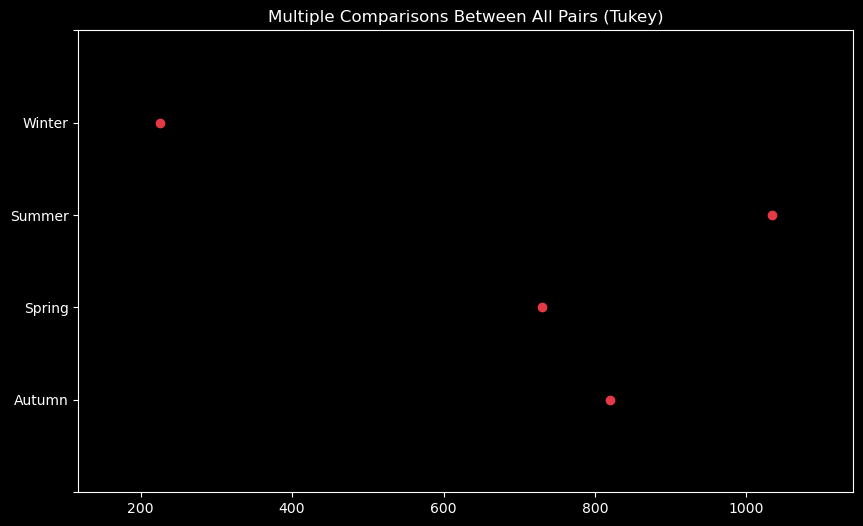

In [199]:
# We need the data in a simple format: one column for values, one for group names
tukey = pairwise_tukeyhsd(endog=df['rented_bike_count'], groups=df['seasons'], alpha=0.05)

# Plot the results
fig = tukey.plot_simultaneous()
plt.style.use('dark_background')
for ax in fig.axes:
    ax.tick_params(colors='white')
    for line in ax.lines:
        if line.get_marker() != 'None':
            line.set_color('#E63946')
        else:
            line.set_color('white')

# The summary table
# print(tukey.summary())

Every season is statistically distinct: winter has the lowest demand (~200), summer the highest (~1100), and spring/autumn are moderate.  
These differences are significant and not random variation.  
We need four distinct operational strategies, with winter capacity at roughly 20% of summer.

In [ ]:
# Two-Way ANOVA
# We know **Seasons** affect rentals. We know **Holidays** affect rentals. But do they **interact**?

model = ols('rented_bike_count ~ C(seasons) * C(holiday)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

interaction_df = df.groupby(['seasons', 'holiday'])['rented_bike_count'].mean().reset_index()

fig = px.line(interaction_df, x='seasons', y='rented_bike_count',
              color='holiday', markers=True, color_discrete_sequence=['#FF0015', 'white'],
              title="Interaction Effect: Impact of Holidays across Seasons")

fig.update_layout(template="plotly_dark")
fig.show()

# Interpretation:
# Look at the P-value for "C(seasons):C(holiday)" in the print output.
# If P < 0.05: The lines in the chart will likely CROSS or diverge. 
# It means the "Holiday Effect" is NOT constant; it changes depending on the season.

                             sum_sq      df           F    PR(>F)
C(seasons)             7.485716e+08     3.0  759.310027  0.000000
C(holiday)             1.930305e+06     1.0    5.873987  0.015386
C(seasons):C(holiday)  2.196218e+05     3.0    0.222772  0.880627
Residual               2.876075e+09  8752.0         NaN       NaN


Season has the strongest effect, with summer having the highest demand and winter the lowest.  
Holidays consistently reduce demand, but the effect is small and similar across all seasons.  
There is no significant interaction; holidays lower demand uniformly without changing the underlying seasonal pattern.

In [ ]:
# Chi-Square Test of Independence
# Is the frequency of **"High Demand"** hours dependent on the **Season**?

# Create a binary 'demand_level' column
avg_rentals = df['rented_bike_count'].mean()
df['demand_level'] = df['rented_bike_count'].apply(lambda x: 'High' if x > avg_rentals else 'Low')

# Create a Contingency Table (Cross-Tab)
contingency_table = pd.crosstab(df['seasons'], df['demand_level'])
print("--- Contingency Table (Observed) ---")
print(contingency_table)

# Run Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

if p < 0.05:
    print("Conclusion: Reject Null. Season and Demand Level are RELATED.")
else:
    print("Conclusion: Fail to Reject. Season and Demand Level are INDEPENDENT.")

# Normalize to show Percentages
contingency_norm = pd.crosstab(df['seasons'], df['demand_level'], normalize='index').reset_index()
contingency_melt = contingency_norm.melt(id_vars='seasons', value_name='proportion', var_name='demand_level')

fig = px.bar(contingency_melt, x='seasons', y='proportion',
             color='demand_level', barmode='stack', 
             color_discrete_map={'High': '#FF0015', 'Low': '#500005'},
             title="Proportion of High vs. Low Demand Hours by Season")

fig.update_layout(template="plotly_dark", yaxis_tickformat=".0%")
fig.show()

--- Contingency Table (Observed) ---
demand_level  High   Low
seasons                 
Autumn        1161  1023
Spring         958  1250
Summer        1380   828
Winter          23  2137

Chi-Square Statistic: 1994.71
P-Value: 0.0000
Conclusion: Reject Null. Season and Demand Level are RELATED.


Summer has the highest proportion of high-demand hours, while winter is almost entirely low demand.  
Autumn is balanced with slightly more high-demand hours, and spring has more low-demand hours.  
The relationship between season and demand level is very strong and not random.

# <span style='color:#e10000'>**Key Insights and Findings**</span>

### Core Demand Drivers

* Bike demand is driven mainly by **season and hour of day**, with **summer evenings** being the busiest period.
* Demand shows three components: a **long-term growth trend**, a strong **seasonal wave**, and a clear **weekly cycle**.
* Season has a **statistically strong effect** on demand; all seasons differ significantly, with **summer highest** and **winter lowest**.
* Demand is not random across seasons, confirmed by a strong chi-square relationship.


### Time-of-Day Patterns

* Two consistent rush hours exist year-round:

  * **Morning peak:** ~8 AM (~1,000 bikes)
  * **Evening peak:** ~6 PM (1,500–1,700 bikes)
* The **evening rush (5–7 PM)** dominates, averaging nearly **double** the morning peak.
* **Monday 6 PM** and **Friday 6 PM** are the busiest hours of the week.
* Weekend demand starts later (after 10 AM) and builds gradually without sharp commute spikes.

**What we suggest**

* We should prioritize fleet allocation toward evening operations.
* A practical allocation is **60% evening**, **30% morning/daytime**, and **10% night**.

### Seasonal & Weekly Behavior

* Summer demand surges to **30k+ daily rentals**, while winter remains very low (**5–10k**).
* Even under perfect weather, winter demand reaches only **~20% of summer levels**.
* Weekday vs weekend patterns shift by season:

  * Summer is commuter-heavy on weekdays.
  * Spring and autumn require balanced 7-day operations.
  * Winter remains commuter-focused despite low volume.
* Holidays show flatter demand with **30–40% lower capacity needs**.

### Weather Impact

* **Temperature is the strongest driver**:

  * Peak demand occurs at **25–30°C**.
  * Demand increases sharply between **15–30°C**.
  * Below **5°C**, demand is minimal.
* Maximum rentals (3,000+) occur at **15–25°C** with **40–70% humidity**.
* **Rain is the biggest suppressor**: even **1–2 mm** reduces demand by **60–80%**.
* High humidity and strong winds (**15+ m/s**) significantly reduce usage.
* Better visibility and dry, calm conditions consistently increase demand.

**What we suggest**

* We should scale operations aggressively on dry days within the 15–30°C range.
* Minimal service is sufficient during cold, wet, or windy conditions.

### Demand Distribution & Risk

* Most days fall in the **0–200 rental range**, but rare spikes exceed **3,500 rentals**.
* Functioning days show wide variability, requiring readiness for extreme but infrequent surges.

**What we suggest**

* Capacity planning should handle rare peaks without overcommitting on low-demand days.

### Modeling & Forecasting

* **Temperature and hour of day** capture most predictive power.
* Adding further complexity yields diminishing returns, especially on non-holiday workdays.
* Temperature influence weakens on holidays due to the absence of commuting behavior.

**What we suggest**

* Forecasting models should focus primarily on **hour** and **temperature**, with season as a baseline adjustment.